2023-02-23 18:32:02.954065: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 18:32:04.022064: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:
2023-02-23 18:32:04.022224: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:
2023-02-23 18:32:04.022234: W tensorflow/compiler/tf2tensorrt/utils/py_uti

Epoch 1/100


2023-02-23 18:32:08.433498: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-02-23 18:32:09.106342: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-02-23 18:32:10.668098: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1dc66f50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-23 18:32:10.668137: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-02-23 18:32:10.686374: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-23 18:32:10.881931: I tensorflow/compiler/jit/xla_compilation_cache.cc:47

391/391 - 10s - loss: 1.6603 - accuracy: 0.3844 - val_loss: 1.3187 - val_accuracy: 0.5279 - 10s/epoch - 25ms/step
Epoch 2/100
391/391 - 5s - loss: 1.2858 - accuracy: 0.5384 - val_loss: 1.1423 - val_accuracy: 0.5960 - 5s/epoch - 13ms/step
Epoch 3/100
391/391 - 5s - loss: 1.1220 - accuracy: 0.6032 - val_loss: 0.9903 - val_accuracy: 0.6563 - 5s/epoch - 13ms/step
Epoch 4/100
391/391 - 5s - loss: 1.0087 - accuracy: 0.6446 - val_loss: 0.9376 - val_accuracy: 0.6714 - 5s/epoch - 13ms/step
Epoch 5/100
391/391 - 5s - loss: 0.9265 - accuracy: 0.6735 - val_loss: 0.8436 - val_accuracy: 0.7024 - 5s/epoch - 12ms/step
Epoch 6/100
391/391 - 5s - loss: 0.8639 - accuracy: 0.6968 - val_loss: 0.8070 - val_accuracy: 0.7187 - 5s/epoch - 12ms/step
Epoch 7/100
391/391 - 5s - loss: 0.8146 - accuracy: 0.7125 - val_loss: 0.7504 - val_accuracy: 0.7379 - 5s/epoch - 13ms/step
Epoch 8/100
391/391 - 5s - loss: 0.7745 - accuracy: 0.7260 - val_loss: 0.7290 - val_accuracy: 0.7461 - 5s/epoch - 13ms/step
Epoch 9/100
391/39

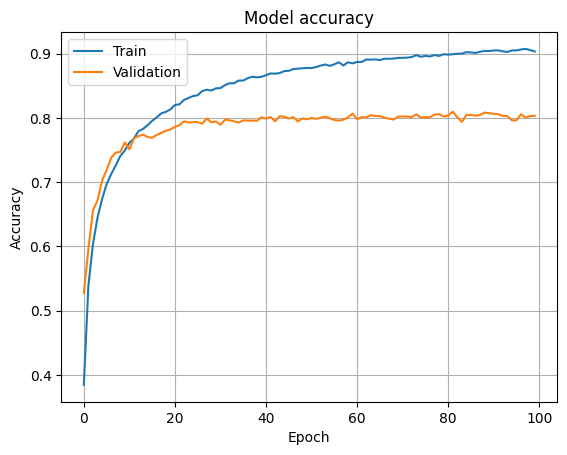

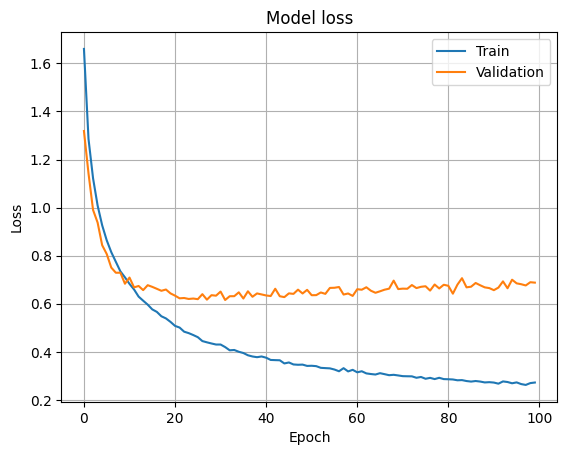

In [1]:
# 1. CIFAR-10으로 컨볼루션 신경망을 학습하고 모델을 파일에 저장하기 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환 
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
data2tensor = lambda x : x.astype(np.float32)/255.0
target2tensor = lambda y : tf.keras.utils.to_categorical(y,len(np.unique(y)))
x_train, x_test = data2tensor(x_train),data2tensor(x_test)
y_train, y_test = target2tensor(y_train),target2tensor(y_test)

# 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

#신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test,verbose=0)
print('정확률은',res[1]*100)

import matplotlib.pyplot as plt 

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'],loc='best')
plt.grid()
plt.show()

# CNN으로 CIFAR-10모델 인식: 저장 
cnn.save('./my_cnn_for_deploy.h5')

./test_images/3.jpg
./test_images/1.jpg
./test_images/5.jpg
./test_images/7.jpg
./test_images/10.jpg
./test_images/8.jpg
./test_images/6.jpg
./test_images/9.jpg
./test_images/4.jpg
./test_images/2.jpg
(10, 32, 32, 3)
1/1 [==============================] - 0s 141ms/step


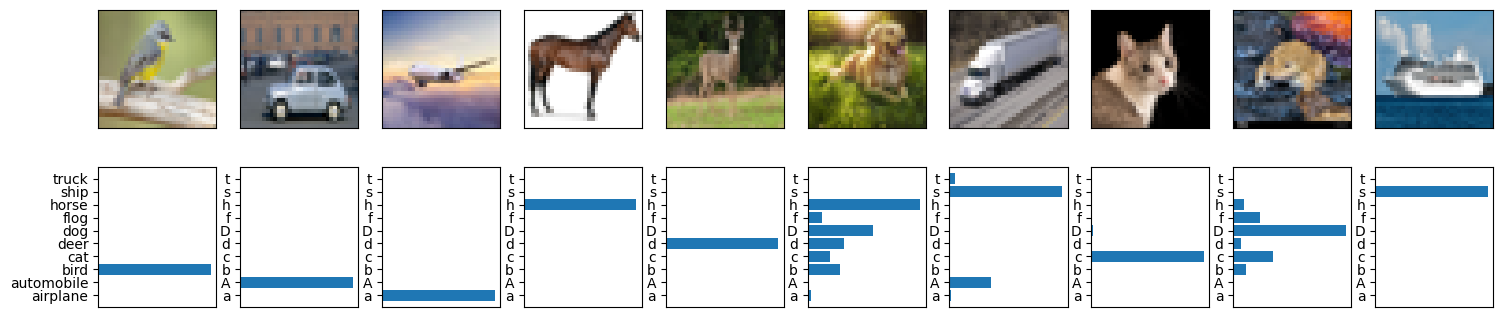

In [2]:
# 2. 폴더에 담겨 있는 영상을 인식 

import numpy as np 
import tensorflow as tf 
from PIL import Image
import matplotlib.pyplot as plot
import os 

cnn=tf.keras.models.load_model('my_cnn_for_deploy.h5')
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'flog', 'horse', 'ship', 'truck']

x_test=[]

path = './test_images/'
for filename in os.listdir(path):
  if 'jpg' not in filename: continue
  print(path+filename)
  img=Image.open(path+filename)
  x=np.asarray(img.resize([32,32]))/255.0
  x_test.append(x)
print(np.array(x_test).shape)
x_test=np.asarray(x_test)

pred=cnn.predict(x_test)

n=len(x_test)
plt.figure(figsize=(18,4))

for i in range(n):
  plt.subplot(2,n,i+1)
  plt.imshow(x_test[i])
  plt.xticks([])
  plt.yticks([])
  plt.subplot(2,n,n+1+i)
  if i==0: plt.barh(class_names,pred[i])
  else : plt.barh(['a','A','b','c','d','D','f','h','s','t'],pred[i])
  plt.xticks([])
plt.show()

In [3]:
# 3. 영상 바구니 담기 - 부류에 따라 영상을 폴더에 담기 
import numpy as np
import tensorflow as tf 
from PIL import Image 
import os 

cnn=tf.keras.models.load_model('my_cnn_for_deploy.h5')
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

x_test=[]
img_origins=[]
fnames=[]
for filename in os.listdir('./test_images/'):
  if 'jpg' not in filename: continue
  img=Image.open('./test_images/'+filename)
  img_origins.append(img)
  fnames.append(filename)
  x=np.asarray(img.resize([32,32]))/255.0
  x_test.append(x)
x_test=np.asarray(x_test)

predicts=cnn.predict(x_test)

os.chdir('./test_images')
if not os.path.isdir('class_buckets'):
  os.mkdir('class_buckets')
os.chdir('class_buckets')
for class_name in class_names:
  if not os.path.isdir(class_name):
    os.mkdir(class_name)

for predict,img_origin,fname in zip(predicts,img_origins,fnames):
  folder_name=class_names[np.argmax(predict)]
  os.chdir(folder_name)
  img_origin.save(fname)
  os.chdir('..')

1/1 [==============================] - 0s 66ms/step


In [4]:
# 4. 다국어 단어 공부: tkinter를 이용한 대화형 인터페이스
import numpy as np 
import tensorflow as tf
import tkinter as tk
from tkinter import filedialog
from PIL import Image
from PIL import ImageTk
from gtts import gTTS
import playsound
import os 

os.chdir(os.path.expanduser('~/파이썬으로 만드는 인공지능'))
cnn=tf.keras.models.load_model("./my_cnn_for_deploy.h5")
class_names_en=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_names_fr=['avion','voiture','oiseau','chatte','biche','chienne','grenouille','jument','navire','un camion']
class_names_de=['Flugzeug','Automobil','Vogel','Katze','Hirsch','Hund','Frosch','Pferd','Schiff','LKW']
class_names={
  'en':class_names_en,
  'fr':class_names_fr,
  'de':class_names_de
}

class_id=0
tk_img=''

def process_image(canvas,label_en,label_fr,label_de):
  global class_id, tk_img

  fname=filedialog.askopenfilename()
  img=Image.open(fname)
  tk_img=img.resize([128,128])
  tk_img=ImageTk.PhotoImage(tk_img)
  canvas.create_image((canvas.winfo_width()/2,canvas.winfo_height()/2),image=tk_img, anchor='center')

  x_test=[]
  x=np.asarray(img.resize([32,32]))/255.0
  x_test.append(x)
  x_test=np.asarray(x_test)
  res=cnn.predict(x_test)
  class_id=np.argmax(res)
  label_en['text']='영어: ' + class_names_en[class_id]
  label_fr['text']='프랑스어: '+class_names_fr[class_id]
  label_de['text']='독일어: '+class_names_de[class_id]
  os.system("powershell.exe '[console]::beep(800,600)'")

def play_tts(lang):
  tts=gTTS(text=class_names[lang][class_id],lang=lang)
  ttsfile='ttsfile.mp3'
  try: os.remove(ttsfile)
  except OSError as error: print(error)
  tts.save(ttsfile)
  playsound.playsound(ttsfile)

def quit_program(gui):
  gui.destroy()

gui=tk.Tk()
gui.title('다국어 단어 공부')
gui.geometry('512x500')

process_button=tk.Button(gui,text='영상 선택', command=lambda : process_image(canvas,label_en,label_fr,label_de))
quit_button=tk.Button(gui,text='끝내기',command=lambda : quit_program(gui))
canvas=tk.Canvas(gui,width=256,height=156,bg='cyan',bd=4)
label_en=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='영어',anchor='w')
label_fr=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='프랑스어',anchor='w')
label_de=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='독일어',anchor='w')
tts_en=tk.Button(gui,text='듣기',command=lambda : play_tts('en'))
tts_fr=tk.Button(gui,text='듣기',command=lambda : play_tts('fr'))
tts_de=tk.Button(gui,text='듣기',command=lambda : play_tts('de'))

process_button.grid(row=0,column=0)
quit_button.grid(row=1,column=0)
canvas.grid(row=0,column=1)
label_en.grid(row=1,column=1,sticky='e')
label_fr.grid(row=2,column=1,sticky='e')
label_de.grid(row=3,column=1,sticky='e')
tts_en.grid(row=1,column=2,sticky='w')
tts_fr.grid(row=2,column=2,sticky='w')
tts_de.grid(row=3,column=2,sticky='w')

gui.mainloop()

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


1/1 [==============================] - 0s 114ms/step


Traceback (most recent call last):
  File "/home/kkw/파이썬으로 만드는 인공지능/.venv/lib/python3.8/site-packages/playsound.py", line 261, in <module>
    playsound(argv[1])
  File "/home/kkw/파이썬으로 만드는 인공지능/.venv/lib/python3.8/site-packages/playsound.py", line 163, in _playsoundNix
    gi.require_version('Gst', '1.0')
  File "/usr/lib/python3/dist-packages/gi/__init__.py", line 129, in require_version
    raise ValueError('Namespace %s not available' % namespace)
ValueError: Namespace Gst not available
Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/tmp/ipykernel_285/3675737440.py", line 67, in <lambda>
    tts_en=tk.Button(gui,text='듣기',command=lambda : play_tts('en'))
  File "/tmp/ipykernel_285/3675737440.py", line 52, in play_tts
    playsound.playsound(ttsfile)
  File "/home/kkw/파이썬으로 만드는 인공지능/.venv/lib/python3.8/site-packages/playsound.py", line 254, in <lambda>
    pl

In [5]:
#5. opencv 와 웹갬을 이용한 영상 인식
import numpy as np 
import tensorflow as tf 
import tkinter as tk 
from PIL import Image
from PIL import ImageTk
from tkinter import filedialog
from gtts import gTTS
import os 
import cv2

cnn=tf.keras.models.load_model('my_cnn_for_deploy.h5')
class_names_en=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_names_fr=['avion','voiture','oiseau','chatte','biche','chienne','grenouille','jument','navire','un camion']
class_names_de=['Flugzeug','Automobil','Vogel','Katze','Hirsch','Hund','Frosch','Pferd','Schiff','LKW']
class_names={
  'en':class_names_en,
  'fr':class_names_fr,
  'de':class_names_de
}

class_id=0
tk_img=''

def process_video(canvas,label_en,label_fr,label_de):
  global class_id, tk_img

  video=cv2.VideoCapture(0)
  while video.isOpened():
    success,frame=video.read()
    if success:
      cv2.imshow('Camera',frame)
      key=cv2.waitKey(1)&0xFF
      if key==27: break
  video.release()
  cv2.destroyAllWindows()
  frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
  img=Image.fromarray(frame)
  tk_img=img.resize([128,128])
  tk_img=ImageTk.PhotoImage(tk_img)
  canvas.create_image((canvas.winfo_width()/2,canvas.winfo_height()/2),image=tk_img, anchor='center')

  x_test=[]
  x=np.asarray(img.resize([32,32]))/255.0
  x_test.append(x)
  x_test=np.asarray(x_test)
  res=cnn.predict(x_test)
  class_id=np.argmax(res)
  label_en['text']='영어: ' + class_names_en[class_id]
  label_fr['text']='프랑스어: '+class_names_fr[class_id]
  label_de['text']='독일어: '+class_names_de[class_id]
  os.system("powershell.exe '[console]::beep(800,600)'")

def play_tts(lang):
  tts=gTTS(text=class_names[lang][class_id],lang=lang)
  ttsfile='ttsfile.mp3'
  try: os.remove(ttsfile)
  except OSError as error: print(error)
  tts.save(ttsfile)
  playsound.playsound(ttsfile)

def quit_program(gui):
  gui.destroy()

gui=tk.Tk()
gui.title('다국어 단어 공부')
gui.geometry('512x500')

process_button=tk.Button(gui,text='비디오 선택', command=lambda : process_video(canvas,label_en,label_fr,label_de))
quit_button=tk.Button(gui,text='끝내기',command=lambda : quit_program(gui))
canvas=tk.Canvas(gui,width=256,height=156,bg='cyan',bd=4)
label_en=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='영어',anchor='w')
label_fr=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='프랑스어',anchor='w')
label_de=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='독일어',anchor='w')
tts_en=tk.Button(gui,text='듣기',command=lambda : play_tts('en'))
tts_fr=tk.Button(gui,text='듣기',command=lambda : play_tts('fr'))
tts_de=tk.Button(gui,text='듣기',command=lambda : play_tts('de'))

process_button.grid(row=0,column=0)
quit_button.grid(row=1,column=0)
canvas.grid(row=0,column=1)
label_en.grid(row=1,column=1,sticky='e')
label_fr.grid(row=2,column=1,sticky='e')
label_de.grid(row=3,column=1,sticky='e')
tts_en.grid(row=1,column=2,sticky='w')
tts_fr.grid(row=2,column=2,sticky='w')
tts_de.grid(row=3,column=2,sticky='w')


In [6]:
# 프로그램 12번을 실행하기 위한 file download
!mkdir yolo
!wget https://pjreddie.com/media/files/yolov3.weights -O yolo/yolov3.weights
!wget https://github.com/pjreddie/darknet/raw/master/data/coco.names -O yolo/coco.names
!wget https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg -O yolo/yolov3.cfg
!wget https://github.com/pjreddie/darknet/raw/master/data/dog.jpg -O yolo/yolo_test.jpg

mkdir: cannot create directory ‘yolo’: File exists
--2023-02-23 18:41:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolo/yolov3.weights’

yolo/yolov3.weights 100%[===================>] 236.52M  4.15MB/s    in 46s     

2023-02-23 18:42:22 (5.10 MB/s) - ‘yolo/yolov3.weights’ saved [248007048/248007048]

--2023-02-23 18:42:22--  https://github.com/pjreddie/darknet/raw/master/data/coco.names
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names [following]
--2023-02-23 18:42:23--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/c

In [7]:
# 6. 웹캠을 이용해 침입자 검출하기
import numpy as np 
import cv2 
import os 

os.chdir('/home/kkw/파이썬으로 만드는 인공지능/yolo')

classes=[]
f=open('coco.names','r')
classes=[line.strip() for line in f.readlines()]
colors=np.random.uniform(0,255,size=(len(classes),3))

yolo_model=cv2.dnn.readNet('yolov3.weights','yolov3.cfg')
layer_names=yolo_model.getLayerNames()
out_layers=[layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers()]

def process_video():
    video=cv2.VideoCapture(0)
    while video.isOpened():
        sucess, img=video.read()
        if sucess:
            height,width,channels=img.shape
            blob=cv2.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True,crop=False)

            yolo_model.setInput(blob)            
            output3=yolo_model.forward(out_layers)

            class_ids,confidences,boxes=[],[],[]
            for output in output3: 
                for vec85 in output:
                    scores=vec85[5:]
                    class_id=np.argmax(scores)
                    confidence=scores[class_id]
                    if confidence>0.5:
                        centerx,centery=int(vec85[0]*width),int(vec85[1]*height)
                    w,h=int(vec85[2]*width),int(vec85[3]*height)
                    x,y=int(centerx-w/2),int(centery-h/2)
                    boxes.append([x,y,w,h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)
            indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
            for i in range(len(boxes)):
                if i in indexes:
                    x,y,w,h=boxes[i]
                    text=str(classes[class_ids[i]])+'%.3f'%confidences[i]
                    cv2.rectangle(img,(x,y),(x+w,y+h),colors[class_ids[i]],2)
                    cv2.putText(img,text,(x,y+30),cv2.FONT_HERSHEY_PLAIN,2,colors[class_ids[i]],2)
            cv2.imshow('Object detection',img)
            if 0 in class_ids:
                print('사람이 나타났다!!!')
                os.system("powershell.exe '[console]::beep(800,600)'")
                
        key=cv2.waitKey(1)&0xFF
        if key==27: break
        
    video.release()
    cv2.destroyAllWindows()

process_video()





[ WARN:0@51.130] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@51.130] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range
